In [167]:
import pandas as pd
import matplotlib.pyplot as plt


In [168]:
cassie = pd.read_csv("cassie_comments_labeled.csv")
cassie.head(10)

,comment,sentiment_label,sentiment_score,label
0,they clearly felt the cold water during beta a...,NEGATIVE,0.999122,0
1,after playing the story i still think the glob...,NEGATIVE,0.991565,0
2,it is broken as the reason most showcases achi...,NEGATIVE,0.999086,0
3,being selfaware that you sound like a hoyo shi...,NEGATIVE,0.989961,0
4,i dont really mind the passives even if they a...,NEGATIVE,0.986159,0
5,im not having castorice and paying more attent...,NEGATIVE,0.997392,0
6,hoyocuck cc,NEGATIVE,0.983056,0
7,the furthest it should go is affecting the opp...,NEGATIVE,0.995662,0
8,i dont think they will do it again most than a...,NEGATIVE,0.996770,0
9,hoyo is a business and the game is easy enough...,POSITIVE,0.999394,1


In [169]:
cassie.isnull().sum()

comment            105
sentiment_label      0
sentiment_score      0
label                0
dtype: int64

In [170]:
cassi_clean = cassie.dropna()
print(cassi_clean)

                                                comment sentiment_label  \
0     they clearly felt the cold water during beta a...        NEGATIVE   
1     after playing the story i still think the glob...        NEGATIVE   
2     it is broken as the reason most showcases achi...        NEGATIVE   
3     being selfaware that you sound like a hoyo shi...        NEGATIVE   
4     i dont really mind the passives even if they a...        NEGATIVE   
...                                                 ...             ...   
7958     i really feel her sadness e s castorice please        POSITIVE   
7959  this felt more than seven minutes these animat...        NEGATIVE   
7960                                               casy        POSITIVE   
7961                          this is certainly english        POSITIVE   
7962    depression is our friend thats quite depressing        NEGATIVE   

      sentiment_score  label  
0            0.999122      0  
1            0.991565      0  
2     

In [171]:
cassi_clean.isnull().sum()

comment            0
sentiment_label    0
sentiment_score    0
label              0
dtype: int64

In [172]:
cassi_clean = cassi_clean[['comment','label']]
cassi_clean.head(10)

,comment,label
0,they clearly felt the cold water during beta a...,0
1,after playing the story i still think the glob...,0
2,it is broken as the reason most showcases achi...,0
3,being selfaware that you sound like a hoyo shi...,0
4,i dont really mind the passives even if they a...,0
5,im not having castorice and paying more attent...,0
6,hoyocuck cc,0
7,the furthest it should go is affecting the opp...,0
8,i dont think they will do it again most than a...,0
9,hoyo is a business and the game is easy enough...,1


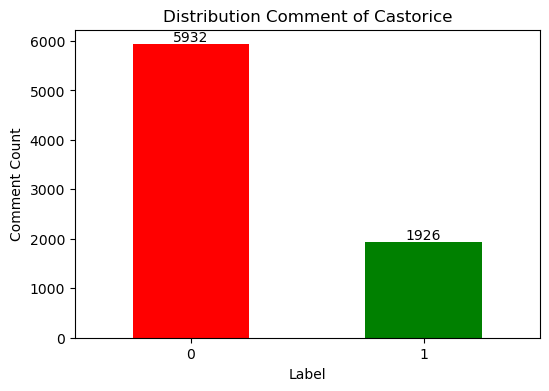

In [173]:
cassi_clean = cassi_clean['label'].value_counts().sort_index()
plt.figure(figsize=(6,4))
colors = ['red','green']
ax = cassi_clean.plot(kind='bar', color=colors)
plt.xlabel("Label")
plt.ylabel("Comment Count")
plt.title("Distribution Comment of Castorice")
plt.xticks(rotation=0)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [174]:
from bertopic import BERTopic

# Ensure cassi_clean includes both 'comment' and 'label' columns
cassi_clean = cassie[['comment', 'label']].dropna()

comments = cassi_clean['comment'].tolist()

#initialize model
topic_model = BERTopic(language="english", verbose=True)

topics, probs = topic_model.fit_transform(comments)

2025-07-18 10:11:59,373 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/246 [00:00<?, ?it/s]

2025-07-18 10:12:11,220 - BERTopic - Embedding - Completed ✓
2025-07-18 10:12:11,221 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-18 10:12:14,192 - BERTopic - Dimensionality - Completed ✓
2025-07-18 10:12:14,194 - BERTopic - Cluster - Start clustering the reduced embeddings
c:\Users\Darren\anaconda3\envs\pytorch_nvidia\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Darren\anaconda3\envs\pytorch_nvidia\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

2025-07-18 10:12:14,505 - BERTopic - Cluster - Completed ✓
2025-07-18 10:12:14,509 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-18 10:12:14,884 - BERTopic - Representation - Completed ✓


In [175]:
topic_info = topic_model.get_topic_info()
topic_info.head(10) # top 10 topics

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3196,-1_the_to_and_they,"[the, to, and, they, of, is, that, for, you, it]",[people complaining about the global passive a...
1,0,259,0_hoyo_hoyoverse_their_community,"[hoyo, hoyoverse, their, community, why, this,...","[hoyo never listen hoyo doesnt care, once a ho..."
2,1,184,1_gacha_games_game_gachas,"[gacha, games, game, gachas, money, are, and, ...",[i dont really get it i just have one thing to...
3,2,166,2_castorice_home_poor_my,"[castorice, home, poor, my, happy, yay, come, ...","[w u need to have castorice for this, castoric..."
4,3,164,3_hsr_play_game_was,"[hsr, play, game, was, playing, im, this, and,...","[hsr could never, hsr could never, people keep..."
5,4,138,4_quit_game_play_enjoy,"[quit, game, play, enjoy, dont, the, playing, ...",[agree with the whole video and people who fee...
6,5,126,5_okay_nice_god_beautiful,"[okay, nice, god, beautiful, exactly, oh, help...","[oh my god, oh my god, oh my god]"
7,6,124,6_global_passives_passive_will,"[global, passives, passive, will, be, more, th...","[global, no global passives, global passive]"
8,7,116,7_acheron_technique_acherons_enemies,"[acheron, technique, acherons, enemies, one, h...",[renbananacatsoup no practical effect in end g...
9,8,96,8_her_passive_pull_she,"[her, passive, pull, she, team, shes, dont, ch...",[the thing is her passive wouldnt allow you to...


In [178]:
topic_indices = [0, 1, 2, 6]
# Retrieve the topics and store them in a dictionary
topics = {index: topic_model.get_topic(index) for index in topic_indices}

# Print the topics
for index, topic in topics.items():
    print(f"Topic {index}: {topic}")

Topic 0: [('hoyo', 0.05492704302881409), ('hoyoverse', 0.018014908569698083), ('their', 0.010700486890226256), ('community', 0.009957414787489776), ('why', 0.008533269629662284), ('this', 0.008039589546058535), ('me', 0.007642365154378048), ('to', 0.007547462697951848), ('money', 0.007520082344053995), ('cc', 0.007360590471080052)]
Topic 1: [('gacha', 0.03727214444174226), ('games', 0.019722818718627144), ('game', 0.011671464452312222), ('gachas', 0.01077469711112473), ('money', 0.009772499627695556), ('are', 0.007683200104309431), ('and', 0.007527178724673347), ('you', 0.0074528627227572804), ('to', 0.007379541072916019), ('of', 0.007028576076074584)]
Topic 2: [('castorice', 0.09880147345027307), ('home', 0.02149943970388629), ('poor', 0.02001251527255189), ('my', 0.014998385586752754), ('happy', 0.013594973570802355), ('yay', 0.01259173059578374), ('come', 0.012550261819421564), ('cry', 0.012425470900860476), ('pull', 0.012089234230112218), ('sad', 0.011857622217310267)]
Topic 6: [('

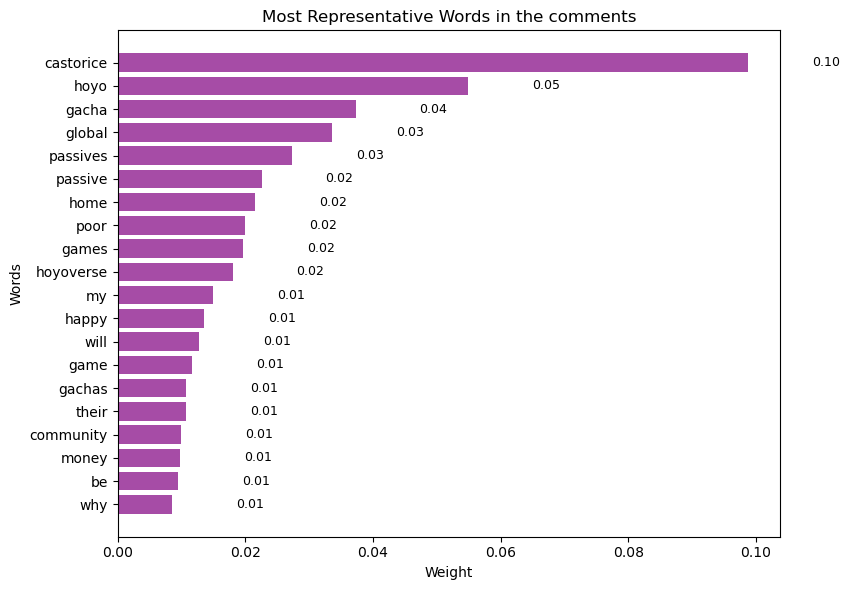

In [184]:
import matplotlib.pyplot as plt

# Define the topic indices you want to visualize
topic_indices = [0, 1, 2, 6]

# Retrieve the topics and their most representative words
topics = {index: topic_model.get_topic(index) for index in topic_indices}

# Prepare data for visualization
words = []
weights = []
labels = []

# Populate data with words and weights
for topic_idx, topic in topics.items():
    for word, weight in topic[:5]:  # Take the top 5 words for each topic
        words.append(word)
        weights.append(weight)
        labels.append(f"Topic {topic_idx}")

# Sort data to descending order
data = sorted(zip(words, weights, labels), key=lambda x: x[1], reverse=True)

words, weights, labels = zip(*data)

# reverse the bars to top to bottom
words = words[::-1]
weights = weights[::-1]

# Create the plot
plt.figure(figsize=(8, 6))
bars = plt.barh(words, weights, color='purple', alpha=0.7)
plt.xlabel("Weight")
plt.ylabel("Words")
plt.title("Most Representative Words in the comments")
plt.tight_layout()

# Add labels to the bars
for bar, weight in zip(bars, weights):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{weight:.2f}', 
             va='center', fontsize=9)

In [190]:
positive_comments = cassi_clean[cassi_clean['label']== 1]['comment'].dropna()
negative_comments = cassi_clean[cassi_clean['label']== 0]['comment'].dropna()

In [191]:
represent_words = ['castorice', 'hoyo', 'gacha', 'global', 'passives']

In [192]:
from collections import Counter

def count_keywords(comments, keywords):
    keyword_counts = Counter()
    for comment in comments:
        tokens = comment.lower().split()
        for word in keywords:
            if word in tokens:
                keyword_counts[word] += 1
    return keyword_counts

pos_counts = count_keywords(positive_comments, represent_words)
neg_counts = count_keywords(negative_comments, represent_words)


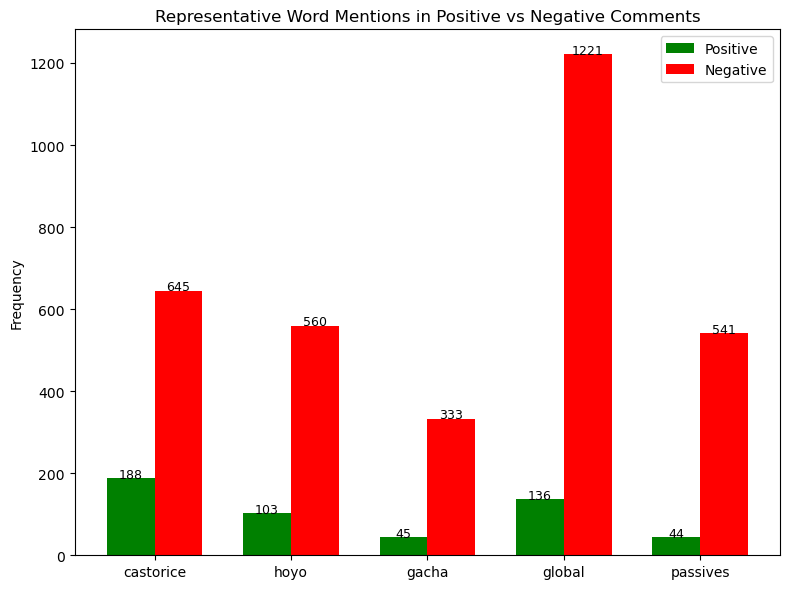

In [193]:
import matplotlib.pyplot as plt
import numpy as np

labels = represent_words
pos_vals = [pos_counts.get(word, 0) for word in labels]
neg_vals = [neg_counts.get(word, 0) for word in labels]

x = np.arange(len(labels))  # Label positions
width = 0.35  # Width of bars

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, pos_vals, width, label='Positive', color='green')
bars2 = ax.bar(x + width/2, neg_vals, width, label='Negative', color='red')

# Labels & formatting
ax.set_ylabel('Frequency')
ax.set_title('Representative Word Mentions in Positive vs Negative Comments')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()

# Optional: annotate
for i in range(len(labels)):
    ax.text(x[i] - width/2, pos_vals[i] + 0.5, str(pos_vals[i]), ha='center', fontsize=9)
    ax.text(x[i] + width/2, neg_vals[i] + 0.5, str(neg_vals[i]), ha='center', fontsize=9)

plt.show()


In [229]:
globalpassivenegative_comments = cassi_clean[
    (cassi_clean['label'] == 0) &
    (cassi_clean['comment'].str.contains("global", case=False, na=False)) &
    (cassi_clean['comment'].str.contains("passives", case=False, na=False))

].reset_index(drop=True)

In [230]:
globalpassivenegative_text = globalpassivenegative_comments['comment'].tolist()
globalpassive_topics, _ =topic_model.transform(globalpassivenegative_text)
globalpassivenegative_comments['topic'] = globalpassive_topics


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2025-07-18 13:10:04,215 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-07-18 13:10:04,351 - BERTopic - Dimensionality - Completed ✓
2025-07-18 13:10:04,352 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-07-18 13:10:04,377 - BERTopic - Cluster - Completed ✓


In [232]:
topic_counts = globalpassivenegative_comments['topic'].value_counts()
print("Top topics that mention 'global' and 'passive' negatively:\n", topic_counts.head())

Top topics that mention 'global' and 'passive' negatively:
 topic
-1     289
 14     32
 6      25
 25     23
 13     23
Name: count, dtype: int64


In [240]:
topic_model.get_topic(6)

[('global', 0.03358231854198101),
 ('passives', 0.02730314106391684),
 ('passive', 0.02257439653053472),
 ('will', 0.012727765003559852),
 ('be', 0.009510690134710766),
 ('more', 0.00941491682559732),
 ('there', 0.009114746658635223),
 ('it', 0.008918009857695329),
 ('they', 0.008684676753859982),
 ('we', 0.007993742074970916)]

In [246]:
topic_comments = globalpassivenegative_comments[globalpassivenegative_comments['topic'] == 6]['comment']
sample_size = min(50, topic_comments.shape[0]) 
sample_comments = topic_comments.sample(sample_size, random_state=42)
for i, comment in enumerate(sample_comments, 1):
    print(f"{i}.{comment}\n")

1.harzinlolz i think you need to reread what i said i know how it works what i meant is it could be dangerous when the passives start stacking and limiting active global passives so they dont start stacking on top of each other

2.as long as more global passives are added i dont give a crap what they do

3.it would be great if they implemented an option to use or not use the global passives so you can decide which ones do you prefer or if you dont want to play with those passives

4.i dont think global passives will be designed to be that powerful like giving attack even if it will give some buff it will probably be not as huge and there will probably be some limitations if there are way too many global passivesfor example only one global passives can be selected per team or something similar this rez for example i rarely die in even the hardest content its really not that useful and wont hurt if you dont have it if the developers dont put any limitations on that i dont think anyone wi

#### Word Cloud

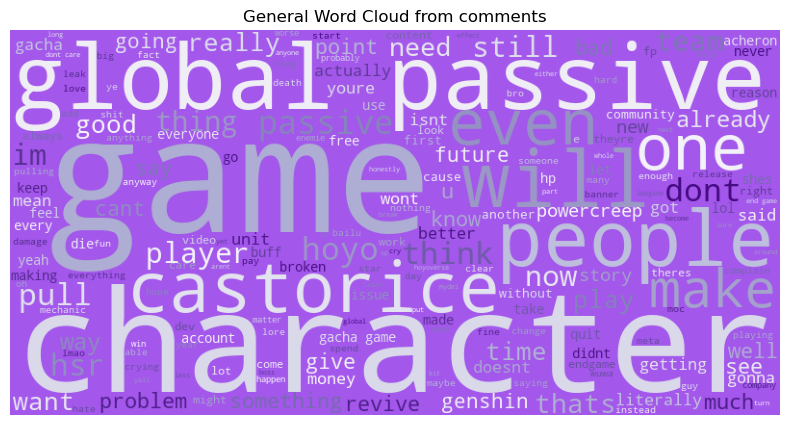

In [247]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure cassi_clean includes both 'comment' and 'label' columns
cassi_clean = cassie[['comment', 'label']].dropna()

# Combine all text data into a single string
all_text = " ".join(cassi_clean['comment'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, 
                      background_color='#a357eb',
                      colormap='Purples', 
                      prefer_horizontal=1).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("General Word Cloud from comments")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


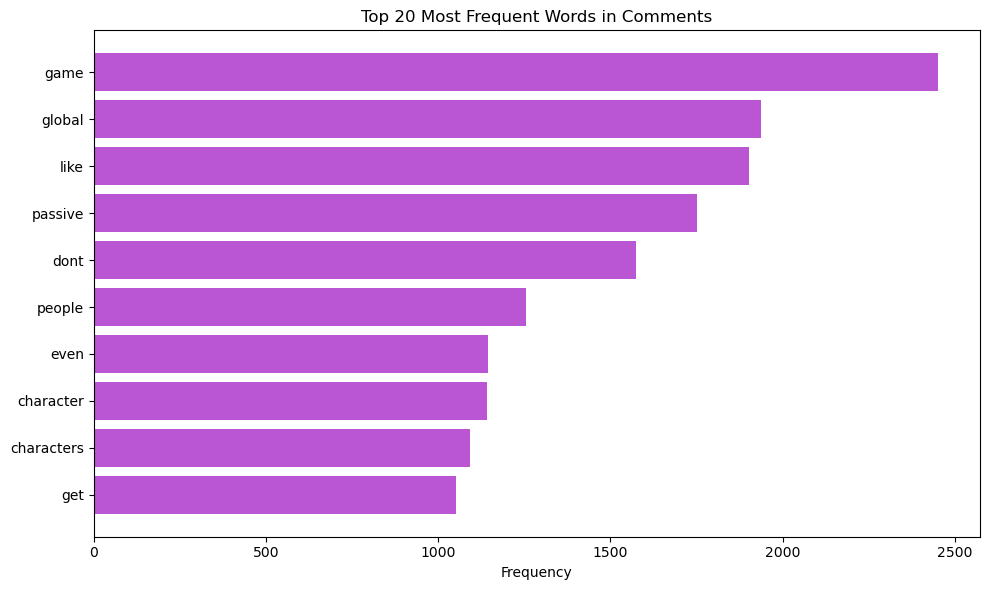

         Word  Frequency
0        game       2450
1      global       1936
2        like       1902
3     passive       1751
4        dont       1574
5      people       1254
6        even       1144
7   character       1142
8  characters       1093
9         get       1052


In [259]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Make sure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Combine all comments into one big list of words
all_words = " ".join(cassi_clean['comment'].tolist()).lower().split()
filtered_words = [word for word in all_words if word.isalpha()and word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Get top 10
top_words = word_counts.most_common(10)

# Convert to DataFrame for visualization
df_top = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_top['Word'][::-1], df_top['Frequency'][::-1], color='mediumorchid')
plt.xlabel("Frequency")
plt.title("Top 20 Most Frequent Words in Comments")
plt.tight_layout()
plt.show()

#print table
print(df_top)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


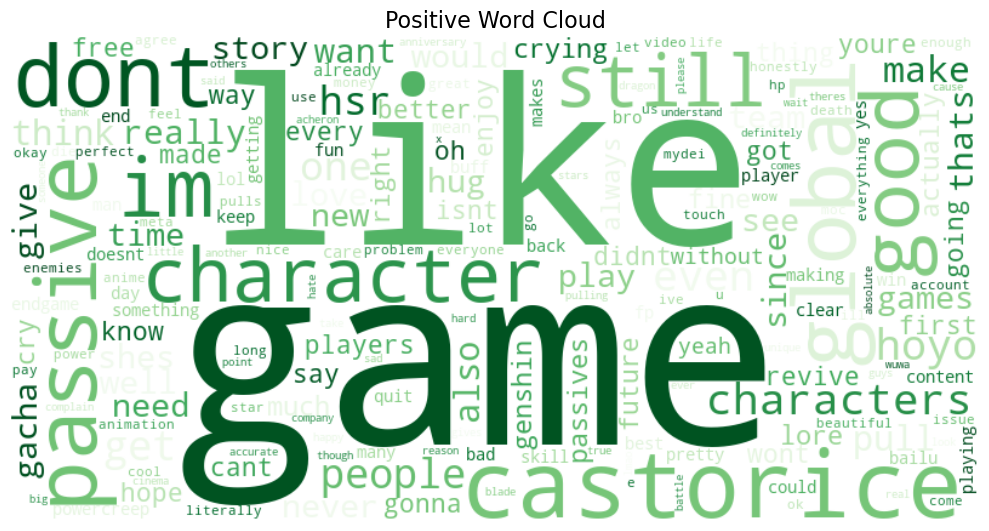

In [260]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Make sure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#positive comments
positive_comments = cassi_clean[cassi_clean['label']== 1]['comment']

# Tokenize and clean
positive_words = " ".join(positive_comments.tolist()).lower().split()
positive_filtered = [word for word in positive_words if word.isalpha() and word not in stop_words]

positive_freq = Counter(positive_filtered)

#Generate Word cloud
wordcloud_posi = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(positive_freq)

#Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_posi, interpolation='bilinear')
plt.title("Positive Word Cloud", fontsize=16)
plt.axis("off")
plt.tight_layout()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


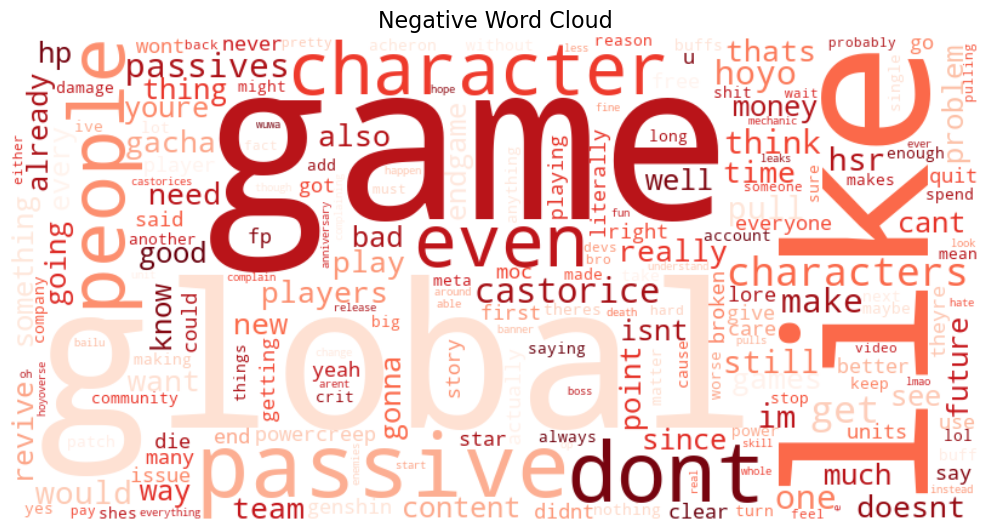

In [261]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Make sure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#negative comments
negative_comments = cassi_clean[cassi_clean['label']== 0]['comment']

# Tokenize and clean
negative_words = " ".join(negative_comments.tolist()).lower().split()
negative_filtered = [word for word in negative_words if word.isalpha() and word not in stop_words]

negative_freq = Counter(negative_filtered)

#Generate Word cloud
wordcloud_nega = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(negative_freq)

#Plot the bar
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_nega, interpolation='bilinear')
plt.title("Negative Word Cloud", fontsize=16)
plt.axis("off")
plt.tight_layout()